<a href="https://colab.research.google.com/github/HodaMemar/SemanticSimilarity_ClinicalNotes/blob/main/Create_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DataSet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists

#Preprocess

In [4]:
df_text=pd.read_csv('/content/drive/MyDrive/PaperA3/TFIDF/L2_G00_Disease')

#Diagnoses_labels

In [36]:
df_ccs=pd.read_csv('/content/drive/MyDrive/PaperA3/Diagnoses_labels/DIAGNOSES_ICD_CCS.csv')


Merge

In [37]:
df_ccs=df_ccs[df_ccs['SEQ_NUM']<=1].filter(items=['L1','HADM_ID'])
df_text = df_text.rename(columns={'label': 'HADM_ID'})
df_total = pd.merge(df_text, df_ccs, on=["HADM_ID"],how="left")
df_total.drop(['Unnamed: 0', 'list_CUIs', 'number_CUIs'], axis=1, inplace=True)

print(df_total.shape)
df_total.head()

(26082, 3)


,HADM_ID,TFIDF,L1
0,100001.0,"c0011880,c0042963,c0011882,c0152020,c0277910,c...",Endocrine; nutritional; and metabolic diseases...
1,100003.0,"c0023890,c0038354,c0020649,c0003962,not_c00148...",Diseases of the digestive system
2,100009.0,"c0002962,c0344315,c0042514,not_c0233568,c00287...",Diseases of the circulatory system
3,100010.0,"c0007134,c0018965,c1262477,c0439650,c0038984,c...",Infectious and parasitic diseases
4,100010.0,"c0007134,c0018965,c1262477,c0439650,c0038984,c...",Neoplasms


In [38]:
from sklearn.preprocessing import LabelEncoder  

labeler = LabelEncoder()
df_total["target"] = labeler.fit_transform(df_total["L1"])
df_total["target"]  = labeler.transform(df_total["L1"])
df_total.head()

,HADM_ID,TFIDF,L1,target
0,100001.0,"c0011880,c0042963,c0011882,c0152020,c0277910,c...",Endocrine; nutritional; and metabolic diseases...,10
1,100003.0,"c0023890,c0038354,c0020649,c0003962,not_c00148...",Diseases of the digestive system,4
2,100009.0,"c0002962,c0344315,c0042514,not_c0233568,c00287...",Diseases of the circulatory system,3
3,100010.0,"c0007134,c0018965,c1262477,c0439650,c0038984,c...",Infectious and parasitic diseases,11
4,100010.0,"c0007134,c0018965,c1262477,c0439650,c0038984,c...",Neoplasms,14


In [64]:
mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(mapping)

{'Complications of pregnancy; childbirth; and the puerperium': 0, 'Congenital anomalies': 1, 'Diseases of the blood and blood-forming organs': 2, 'Diseases of the circulatory system': 3, 'Diseases of the digestive system': 4, 'Diseases of the genitourinary system': 5, 'Diseases of the musculoskeletal system and connective tissue': 6, 'Diseases of the nervous system and sense organs': 7, 'Diseases of the respiratory system': 8, 'Diseases of the skin and subcutaneous tissue': 9, 'Endocrine; nutritional; and metabolic diseases and immunity disorders': 10, 'Infectious and parasitic diseases': 11, 'Injury and poisoning': 12, 'Mental Illness': 13, 'Neoplasms': 14, 'Residual codes; unclassified; all E codes [259. and 260.]': 15, 'Symptoms; signs; and ill-defined conditions and factors influencing health status': 16, nan: 17}


Storing The Train and Test Set

In [31]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [39]:
X = df_total.filter(items=['TFIDF','HADM_ID'])
y = df_total.filter(items=['target'])

train_features, test_features, train_targets, test_targets = train_test_split(
        X, y,
        train_size=0.8,
        test_size=0.2,
        # random but same for all run, also accurancy depends on the
        # selection of data e.g. if we put 10 then accuracy will be 1.0
        # in this example
        random_state=23,
        # keep same proportion of 'target' in test and target data
        stratify=y
    )

In [53]:
train_cts = train_targets.groupby("target").size()
test_cts  = test_targets.groupby("target").size()

Text(0, 0.5, 'Counts')

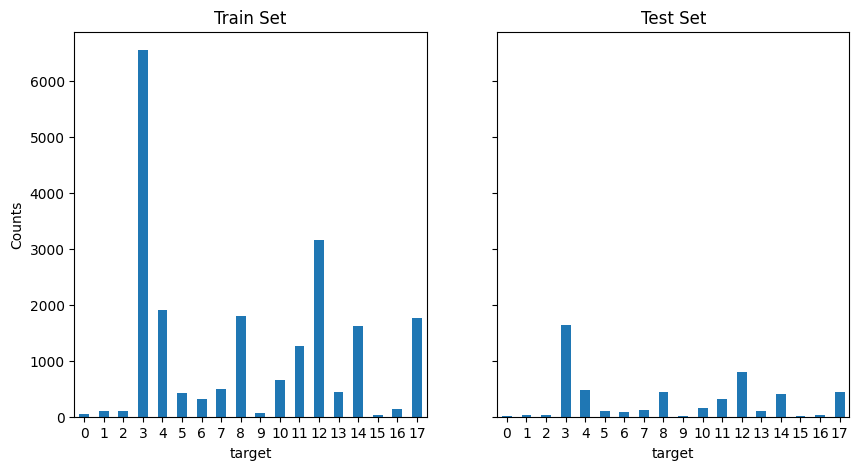

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
train_cts.plot(kind='bar',ax= ax1,rot=0)
test_cts.plot(kind='bar',ax= ax2,rot=0)
ax1.set_title('Train Set')
ax2.set_title('Test Set')
ax1.set_ylabel("Counts")

In terms of percentages they are the exact same percentage of target classes:



Text(0, 0.5, '%')

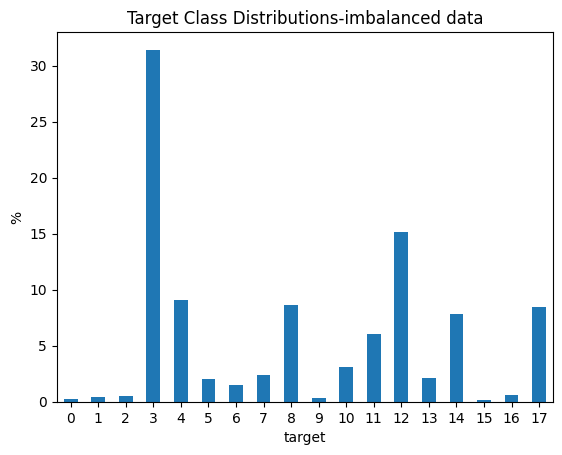

In [57]:
percents = 100 * test_targets.groupby("target").size() / test_targets.shape[0]

percents.plot(kind='bar', title='Target Class Distributions-imbalanced data', rot=0)
plt.ylabel("%")

WordCloud

Now lets take a look a the most commonly used words in each target class using a word cloud



In [75]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(df: pd.DataFrame, category: str, target: int) -> None:
    words = " ".join(df_total[df_total["target"] == target]["TFIDF"].values)

    plt.rcParams['figure.figsize'] = 5, 10
    wordcloud = WordCloud(stopwords=STOPWORDS, 
                          background_color="white",
                          max_words=100).generate(words)

    plt.title("WordCloud For {}".format(category))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

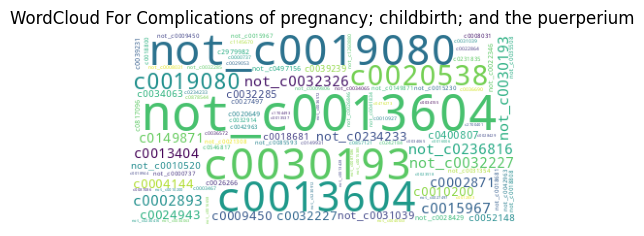

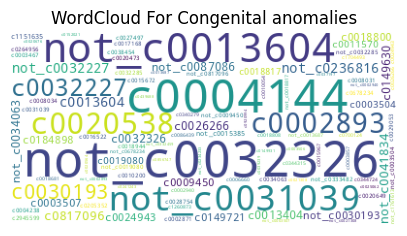

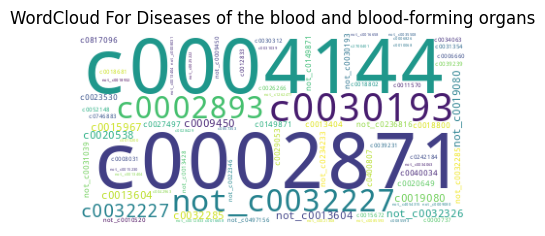

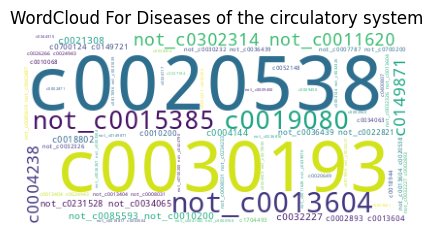

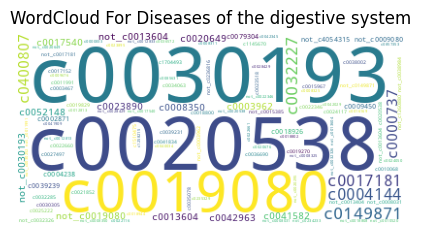

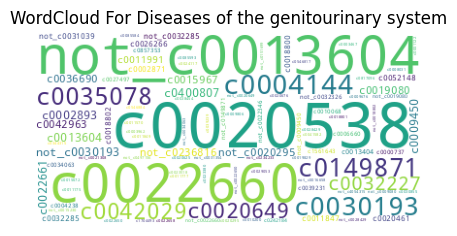

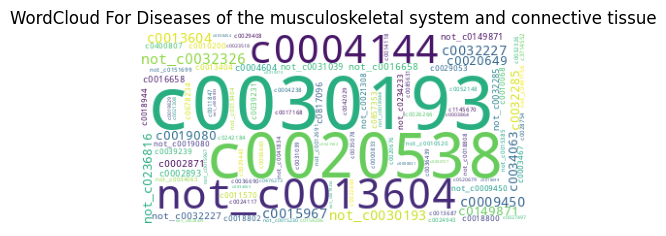

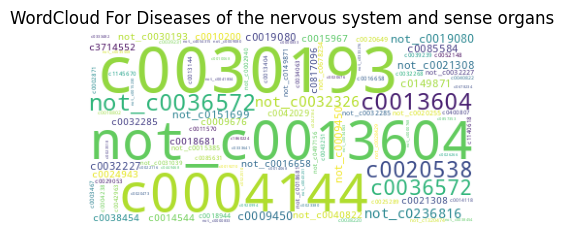

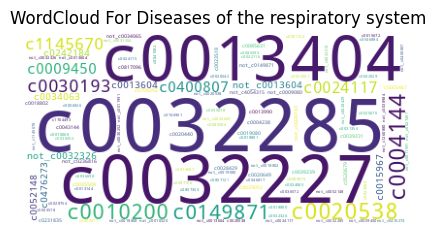

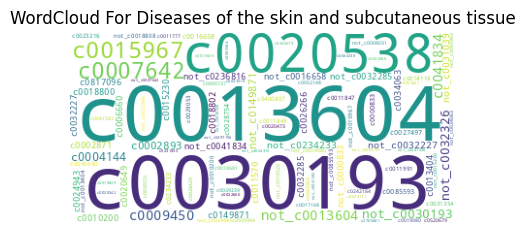

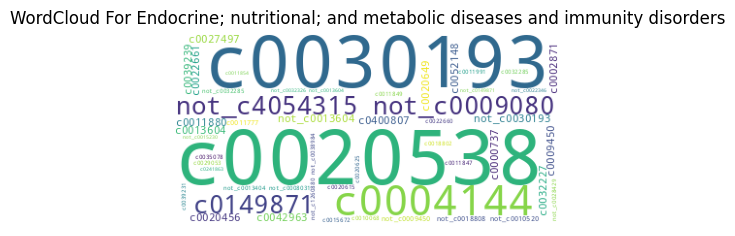

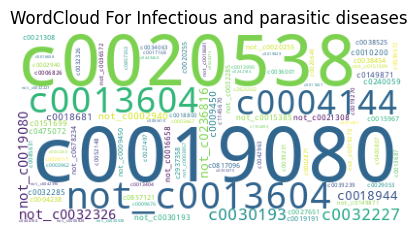

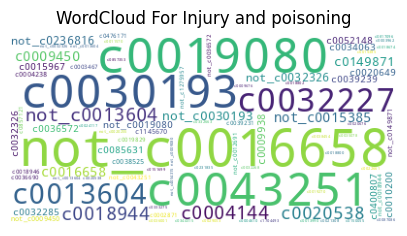

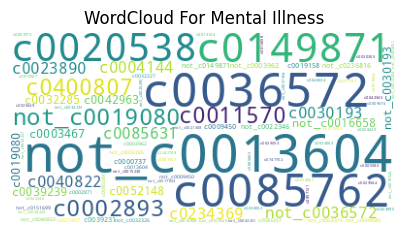

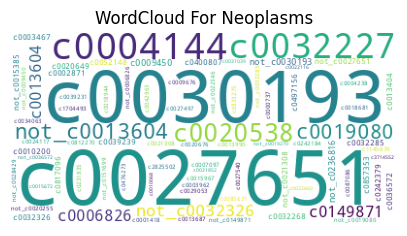

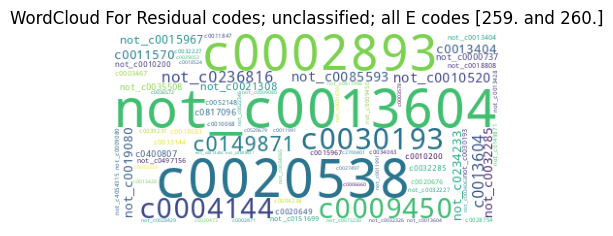

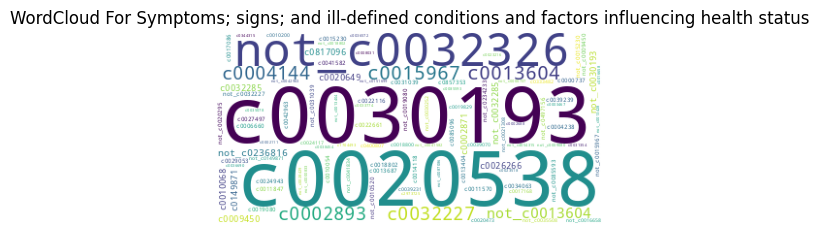

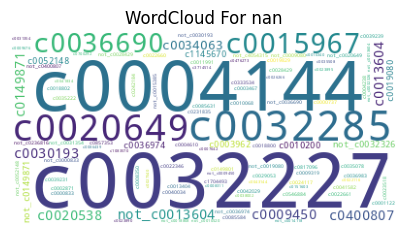

In [76]:
for L1, target in mapping.items():
    plot_wordcloud(df_total, L1, target)

TFIDF

In [41]:
corpus=df_text['TFIDF'].tolist()


In [42]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

vectorizer =  CountVectorizer()
tf  = vectorizer.fit_transform(corpus)

# get the words in bag-of-words
print(vectorizer.get_feature_names_out())

# get the counts!
print(tf.toarray())
    




['c0000294' 'c0000325' 'c0000618' ... 'not_c5230913' 'not_c5230914'
 'not_c5233709']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#تولید دیکشنری از مفاهیم

In [6]:
dd=pd.read_csv('/content/drive/MyDrive/PaperA3/Diagnoses_labels/Dictionary.csv')
dictionary = dict(zip(dd.first_cuid, dd.canonical_name))

#Integration

#تولید دیتاست

In [7]:
import ast
def complex_function( ini_list):

    res= ast.literal_eval(ini_list)
    tms_text=''
 
    try:
      for i in res:
        
        if(i.upper().startswith("NOT_")):
          tms_text=tms_text +'NOT_'+dictionary[i[4:].upper()] +','
        else:
          tms_text=tms_text +dictionary[i.upper()] +','  
    except :
          print(i)    
    return tms_text 

In [8]:
complex_function(df_text['list_CUIs'][0])

'Diabetic Ketoacidosis,Vomiting,Diabetic Neuropathies,Gastroparesis,Ejection Murmurs,Kidney Diseases,Autonomic neuropathy,Chronic kidney disease stage 1,Spinal Fractures,Proteinuria,Hypotension, Orthostatic,NOT_Clostridium difficile colitis,Nausea,Retinal Diseases,Chronic Kidney Insufficiency,Hematemesis,NOT_Contusions,diabetic,Chronic Kidney Diseases,Chills,NOT_Congenital Abnormality,Diarrhea,Hypertensive disease,NOT_Pulmonary Edema,NOT_Pneumonia,Dyspnea,NOT_Pleural effusion disorder,Refractory anemias,Pain,NOT_Edema,'

In [13]:
#only for TFIDF
df_text['Text'] = df_text.apply(lambda x: complex_function(x['list_CUIs']), axis=1)



(26082, 8)


,Unnamed: 0,HADM_ID,TFIDF,list_CUIs,number_CUIs,Text,L1,target
0,0,100001.0,"c0011880,c0042963,c0011882,c0152020,c0277910,c...","['c0011880', 'c0042963', 'c0011882', 'c0152020...",30,"Diabetic Ketoacidosis,Vomiting,Diabetic Neurop...",Endocrine; nutritional; and metabolic diseases...,11
1,1,100003.0,"c0023890,c0038354,c0020649,c0003962,not_c00148...","['c0023890', 'c0038354', 'c0020649', 'c0003962...",98,"Liver Cirrhosis,Stomach Diseases,Hypotension,A...",Diseases of the digestive system,5
2,2,100009.0,"c0002962,c0344315,c0042514,not_c0233568,c00287...","['c0002962', 'c0344315', 'c0042514', 'not_c023...",46,"Angina Pectoris,Depressed mood,Tachycardia, Ve...",Diseases of the circulatory system,4
3,3,100010.0,"c0007134,c0018965,c1262477,c0439650,c0038984,c...","['c0007134', 'c0018965', 'c1262477', 'c0439650...",17,"Renal Cell Carcinoma,Hematuria,Weight decrease...",Infectious and parasitic diseases,12
4,3,100010.0,"c0007134,c0018965,c1262477,c0439650,c0038984,c...","['c0007134', 'c0018965', 'c1262477', 'c0439650...",17,"Renal Cell Carcinoma,Hematuria,Weight decrease...",Neoplasms,15


In [44]:
#Only for TFIDF




Index(['HADM_ID', 'Text', 'target'], dtype='object')

In [45]:


df_total = df_total.rename(columns={'Text': 'comment_text'})

,L1,HADM_ID,target
0,Diseases of the circulatory system,172335,4
14,Diseases of the circulatory system,173633,4
28,Diseases of the digestive system,174105,5
33,Neoplasms,109976,15
36,Diseases of the circulatory system,178393,4


In [46]:
df_total

,HADM_ID,comment_text,target
0,100001.0,"Diabetic Ketoacidosis,Vomiting,Diabetic Neurop...",11
1,100003.0,"Liver Cirrhosis,Stomach Diseases,Hypotension,A...",5
2,100009.0,"Angina Pectoris,Depressed mood,Tachycardia, Ve...",4
3,100010.0,"Renal Cell Carcinoma,Hematuria,Weight decrease...",12
4,100010.0,"Renal Cell Carcinoma,Hematuria,Weight decrease...",15
...,...,...,...
26077,199336.0,"Urinary tract infection,Pressure Ulcer,Myeliti...",18
26078,199359.0,"Subarachnoid Hemorrhage,Cerebral ventriculomeg...",13
26079,199557.0,"Chronic Obstructive Airway Disease,Respiratory...",9
26080,199743.0,"Hematemesis,Injury of liver,Substance abuse pr...",5


In [48]:
df_stastics=df_ccs.groupby(['L1']).HADM_ID.count().reset_index().sort_values(by='HADM_ID',ascending=False)

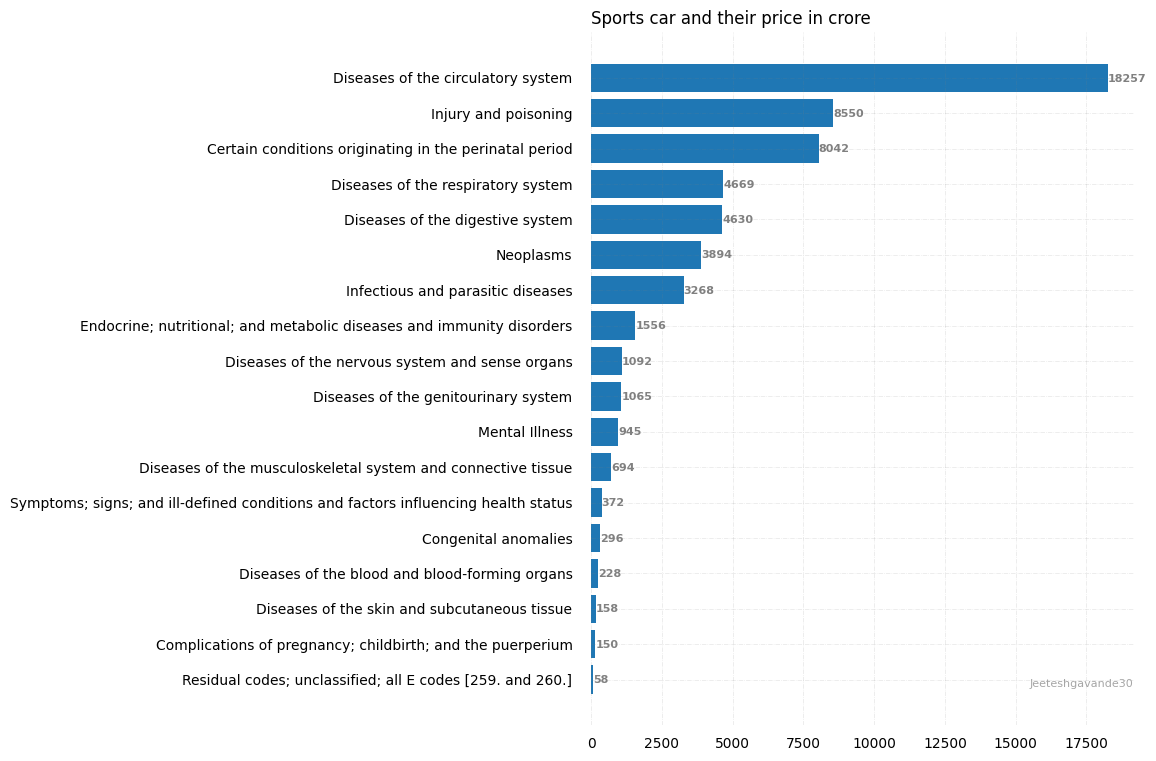

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
 

 
name = df_stastics['L1']
price = df_stastics['HADM_ID']
 
# Figure Size
fig, ax = plt.subplots(figsize =(7, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid( color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 8,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

{'Certain conditions originating in the perinatal period': 0, 'Complications of pregnancy; childbirth; and the puerperium': 1, 'Congenital anomalies': 2, 'Diseases of the blood and blood-forming organs': 3, 'Diseases of the circulatory system': 4, 'Diseases of the digestive system': 5, 'Diseases of the genitourinary system': 6, 'Diseases of the musculoskeletal system and connective tissue': 7, 'Diseases of the nervous system and sense organs': 8, 'Diseases of the respiratory system': 9, 'Diseases of the skin and subcutaneous tissue': 10, 'Endocrine; nutritional; and metabolic diseases and immunity disorders': 11, 'Infectious and parasitic diseases': 12, 'Injury and poisoning': 13, 'Mental Illness': 14, 'Neoplasms': 15, 'Residual codes; unclassified; all E codes [259. and 260.]': 16, 'Symptoms; signs; and ill-defined conditions and factors influencing health status': 17, nan: 18}


Let's break out data set into a 75% training and 25% testing. We create the training set:

In [ ]:
X


In [75]:
y

,HADM_ID,comment_text,target
0,100001.0,"Diabetic Ketoacidosis,Vomiting,Diabetic Neurop...",11
1,100003.0,"Liver Cirrhosis,Stomach Diseases,Hypotension,A...",5
2,100009.0,"Angina Pectoris,Depressed mood,Tachycardia, Ve...",4
3,100010.0,"Renal Cell Carcinoma,Hematuria,Weight decrease...",12
4,100010.0,"Renal Cell Carcinoma,Hematuria,Weight decrease...",15
...,...,...,...
26077,199336.0,"Urinary tract infection,Pressure Ulcer,Myeliti...",18
26078,199359.0,"Subarachnoid Hemorrhage,Cerebral ventriculomeg...",13
26079,199557.0,"Chronic Obstructive Airway Disease,Respiratory...",9
26080,199743.0,"Hematemesis,Injury of liver,Substance abuse pr...",5


In [68]:
train_cts = train_targets.groupby("target").size()
test_cts  = test_targets.groupby("target").size()

AttributeError: ignored

In [69]:
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])